# FINAL PROJECT

This final project is an analysis of the network of spotify music artists. In particular, the artists are the nodes, and the edges are the featuring between them.
The chosen dataset can be found at:
https://www.kaggle.com/datasets/jfreyberg/spotify-artist-feature-collaboration-network?select=nodes.csv

In [1]:
# basic imports
import numpy as np
from numpy import linalg as LA
import pandas as pd # useful dataframe support
import scipy as sp
from matplotlib import pyplot as plt # plot operations
import networkx as nx # useful for network operations
import nltk # useful for sentence parsing
import re # regular expressions for text parsing and finding proper names
import networkx.algorithms.community as nx_comm
import sklearn
from sklearn.cluster import SpectralClustering
import communities.algorithms as comm
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Giovanni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## PART 1: Data preprocessing

In this first part, data is stored in the structures used for the whole project and modified if needed.

In [2]:
feats = pd.read_csv("./data/edges.csv")
artists = pd.read_csv("./data/nodes.csv")

print(feats.head())
print(artists.head())


                     id_0                    id_1
0  76M2Ekj8bG8W7X2nbx2CpF  7sfl4Xt5KmfyDs2T3SVSMK
1  0hk4xVujcyOr6USD95wcWb  7Do8se3ZoaVqUt3woqqSrD
2  38jpuy3yt3QIxQ8Fn1HTeJ  4csQIMQm6vI2A2SCVDuM2z
3  6PvcxssrQ0QaJVaBWHD07l  6UCQYrcJ6wab6gnQ89OJFh
4  2R1QrQqWuw3IjoP5dXRFjt  4mk1ScvOUkuQzzCZpT6bc0
               spotify_id                name  followers  popularity  \
0  48WvrUGoijadXXCsGocwM4           Byklubben     1738.0          24   
1  4lDiJcOJ2GLCK6p9q5BgfK            Kontra K  1999676.0          72   
2  652XIvIBNGg3C0KIGEJWit               Maxim    34596.0          36   
3  3dXC1YPbnQPsfHPVkm1ipj  Christopher Martin   249233.0          52   
4  74terC9ol9zMo8rfzhSOiG       Jakob Hellman    21193.0          39   

                                              genres  \
0                     ['nordic house', 'russelater']   
1             ['christlicher rap', 'german hip hop']   
2                                                 []   
3  ['dancehall', 'lovers rock', 'modern reg

In [3]:
#cast all names to string(there are floats) 

for j in range(artists.shape[0]):
    artists.loc[artists.index[j] , 'name'] = str(artists.loc[artists.index[j] , 'name'])


In [4]:
G = nx.Graph()

artists_attr = []
attributes = list(artists.columns.values)
attributes.remove('spotify_id')

for i in range(len(attributes)):
    artists_attr.append(dict())


# add one node per artist
for i in range(len(artists)):
    #add id as node
    current_id = artists.loc[artists.index[i] , 'spotify_id']
    G.add_node(current_id, size = 1)
    
    #create id-attributes dictionary
    for j in range(len(attributes)):
        dict_entry = artists.iloc[i, j+1]
        artists_attr[j][current_id] = dict_entry
    
    
# add node labels
for i in range(len(attributes)):
    nx.set_node_attributes(G, artists_attr[i], name = attributes[i])

In [5]:
# add the edges
for i in range(len(feats)):
    current_edge = list(feats.iloc[i])
    G.add_edge(current_edge[0], current_edge[1])
    
    
print(nx.info(G))


#print(G.nodes[0][""])

Graph with 156326 nodes and 300386 edges


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_10224\1509456981.py:7: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [6]:
print(G.degree['4mk1ScvOUkuQzzCZpT6bc0'])
names = nx.get_node_attributes(G, "name")

print(list(artists.iloc[100, 1:]))

print('\N{CJK UNIFIED IDEOGRAPH-591C}')

for j in range(artists.shape[0]):
    cur_name = artists.loc[artists.index[j] , 'name']


10
['Mokke', 4495.0, 42, "['swedish drill', 'swedish hip hop', 'swedish trap pop']", "['se (2)']"]
夜


In [7]:
import matplotlib.font_manager as fm
fprop = fm.FontProperties(fname='./Fonts/NotoSansJP-Black.otf')
fprop = fm.FontProperties(fname='./Fonts/NotoSansThai-Black.ttf')
fprop = fm.FontProperties(fname='./Fonts/NotoSansKR-Black.otf')
fprop = fm.FontProperties(fname='./Fonts/NotoSansTC-Black.ttf')

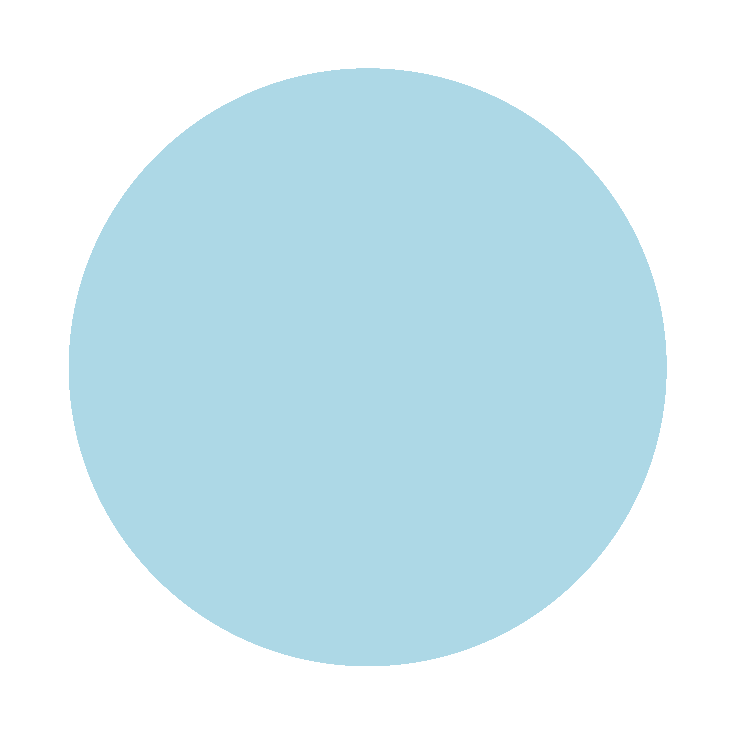

In [8]:
def print_graph(G):
    g_draw = G

    fig = plt.figure(figsize=(10,10))
    pos = nx.circular_layout(g_draw)
    nx.draw(g_draw, pos, node_color='lightblue', edge_color='lightblue', node_size=0.1, with_labels = False, width=0.5)
    
    
    
print_graph(G)
plt.savefig('./Figures/socialNetwork.png',dpi=300)
plt.show()

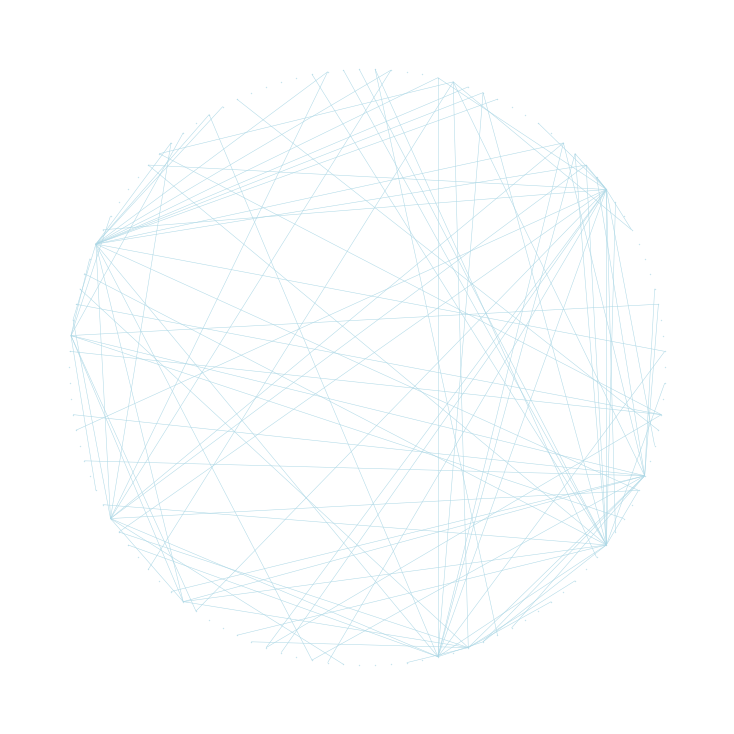

In [9]:
from matplotlib import pylab
#https://stackoverflow.com/questions/17381006/large-graph-visualization-with-python-and-networkx

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    #nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

# https://networkx.org/documentation/stable/reference/classes/graph.html
def print_genre(graph, genre):
    H = nx.Graph()
    genreList = nx.get_node_attributes(graph, "genres")
    ids = list(genreList.keys())
    #print(ids[0])
    #print(genreList[ids[0]])
    
    subgraphNodes = []
    for i in range(len(ids)):
        if genre in genreList[ids[i]]:
            subgraphNodes.append(ids[i])
            
    H = graph.subgraph(subgraphNodes)
        
    g_draw = H

    fig = plt.figure(figsize=(10,10))
    pos = nx.circular_layout(g_draw)
    nx.draw(g_draw, pos, node_color='lightblue', edge_color='lightblue', node_size=0.1, with_labels = False, width=0.5)
    
#Assuming that the graph g has nodes and edges entered
#save_graph(G,"my_graph.pdf")
print_genre(G, "modern reggae")
plt.savefig('./Figures/subgraph.png',dpi=300)
plt.show()

In [10]:
# Graph sampling for reducing the dataset to workable size
'''
Sample a graph to reduce it to only nodes above a certain degree threshold
'''
def sample_graph(graph, thresh=3):
    H = nx.Graph()
    ids = list(graph.nodes)
    subgraphNodes = []
    for i in range(len(ids)):
        if graph.degree[ids[i]] > thresh:
            subgraphNodes.append(ids[i])
            
    H = graph.subgraph(subgraphNodes)
    return H

'''
Sample a graph to reduce it to a random fraction of nodes, this method leaves out A LOT of edges
'''
def sample_graph_random(graph, prob=0.1):
    H = nx.Graph()
    ids = list(graph.nodes)
    subgraphNodes = []
    for i in range(len(ids)):
        if np.random.uniform() < prob:
            subgraphNodes.append(ids[i])
            
    H = graph.subgraph(subgraphNodes)
    return H

'''
Sample a graph by picking nodes with a probability proportional to their degree
'''
def sample_graph_weighted_random(graph):
    H = nx.Graph()
    ids = list(graph.nodes)
    subgraphNodes = []
    H = sample_graph(graph, thresh = 50)
    MaxDeg = 0
    idsH = list(H.nodes)
    for i in range(len(H.nodes)):
        if H.degree[idsH[i]] > MaxDeg:
            MaxDeg = H.degree[idsH[i]]

    for i in range(len(ids)):
        if np.random.uniform() < graph.degree[ids[i]]/MaxDeg:
            subgraphNodes.append(ids[i])
            
    H = graph.subgraph(subgraphNodes)
    return H

# try to find a suitable threshold
H = sample_graph(G, thresh=10)
R = sample_graph_random(G, prob=0.1)
W = sample_graph_weighted_random(G)
print(nx.info(H))
print(nx.info(R))
print(nx.info(W)) # this seems the most well-balanced

C:\Users\Giovanni\AppData\Local\Temp\ipykernel_10224\1572000348.py:55: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(H))


Graph with 9755 nodes and 81732 edges
Graph with 15513 nodes and 3206 edges


C:\Users\Giovanni\AppData\Local\Temp\ipykernel_10224\1572000348.py:56: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(R))
C:\Users\Giovanni\AppData\Local\Temp\ipykernel_10224\1572000348.py:57: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(W)) # this seems the most well-balanced


Graph with 3764 nodes and 15762 edges


## Community analysis ##
1- Community detection (try to run an estimation of how many genres there are to determine k): 
 - Louvain -> implemented in networkx
 - Girvan Newman -> implemented in networkx
 - Spectral clustering -> sklearn implementation <br/>
 
propagation of sampled assignments via nearest neighbor
<br/>

2- evaluation with paper metrics: <br/>
https://www.cs.rpi.edu/~szymansk/papers/SocCom-metric.13.pdf <br/>
https://arxiv.org/pdf/1610.03176.pdf 
<br/>

3- Alignment of communities with e.g. genre subgraphs, how accurate are the communities detected to the subraphs of music genres  <br/>

In [11]:
# the first step is to try to determine how many communities we detect
# try to determine k automatically with the Louvain algorithm

LouvainComms = nx_comm.louvain_communities(G)

In [12]:
# obviously this graph is too big!
# we need to try and sample it to reduce its size
print(len(LouvainComms))

4509


In [13]:
# Sample the graph to only nodes above a certain degree
H = sample_graph(G, thresh=10)
# Louvain community analysis
LouvainComms = nx_comm.louvain_communities(W)
print(len(LouvainComms))

972


In [14]:
# Girvan-Newman community analysis
# THIS IS FUCKING SLOW MAYBE DON'T DO IT
"""
GNComms = nx_comm.girvan_newman(H)
comm_count = 0
for comm in GNComms:
    comm_count += 1
    
print(comm_count)
"""

'\nGNComms = nx_comm.girvan_newman(H)\ncomm_count = 0\nfor comm in GNComms:\n    comm_count += 1\n    \nprint(comm_count)\n'

In [15]:
# Spectral clustering functions
# computing the adjacency matrix
def compute_adjmat(H):
    index_ids = dict()
    ids_index = dict()
    i = 0
    for ID in H.nodes:
        index_ids.update({ID:i})
        ids_index.update({i:ID})
        i += 1

    AdjMat = np.empty((len(H.nodes), len(H.nodes)))
    for edge in list(H.edges):
        AdjMat[index_ids.get(edge[0]), index_ids.get(edge[1])] = 1
        AdjMat[index_ids.get(edge[1]), index_ids.get(edge[0])] = 1
    return AdjMat

# computing the L matrix
def compute_L(H):
    index_ids = dict()
    ids_index = dict()
    i = 0
    for ID in H.nodes:
        index_ids.update({ID:i})
        ids_index.update({i:ID})
        i += 1
        
    AdjMat = compute_adjmat(H)
    L = np.zeros((len(H.nodes), len(H.nodes)))
    for i in range(len(H.nodes)):
        L[i,i] = H.degree[ids_index.get(i)]
    
    L = L - AdjMat
    return L

'''
AdjMat = compute_adjmat(W)
print(AdjMat.shape)
L = compute_L(W)
print(L.shape)
'''

def spectral_cluster(H, accuracy= 1e-10):
    # find k wth given accuracy
    AdjMat = compute_adjmat(H)
    L = compute_L(H)
    w,v = np.linalg.eig(L)
    zeros = [x for x in w if abs(x) < 0 + accuracy]
    k = len(zeros)
    communities = SpectralClustering(n_clusters=k, assign_labels='discretize', random_state=0, affinity='precomputed').fit(AdjMat)
    return communities.labels_

clustering = spectral_cluster(W)


C:\Users\Giovanni\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


3764
[339 476 558  61 655 386 209  73 337 249]


In [16]:
# Is this closer to the groud truth of G?
print(len(clustering))
print(clustering[0:10])

3764
[339 476 558  61 655 386 209  73 337 249]
